In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid", palette="deep")

In [4]:
df = pd.read_csv('D:/backup/AI course work/Guvi/projects/PatrolIQ Smart Safety Analytics Platform/Data/clean_crime_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494276 entries, 0 to 494275
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  494276 non-null  object 
 1   Primary Type          494276 non-null  object 
 2   Description           494276 non-null  object 
 3   Location Description  494276 non-null  object 
 4   Arrest                494276 non-null  int64  
 5   Domestic              494276 non-null  int64  
 6   Beat                  494276 non-null  int64  
 7   District              494276 non-null  float64
 8   Ward                  494276 non-null  float64
 9   Community Area        494276 non-null  float64
 10  FBI Code              494276 non-null  object 
 11  X Coordinate          494276 non-null  float64
 12  Y Coordinate          494276 non-null  float64
 13  Year                  494276 non-null  int64  
 14  Latitude              494276 non-null  float64
 15  

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
df['Date'].dtypes

dtype('<M8[ns]')

In [8]:
df.describe()

,Date,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,494276,494276.000000,494276.000000,494276.000000,494276.000000,494276.000000,494276.000000,4.942760e+05,4.942760e+05,494276.000000,494276.000000,494276.000000
mean,2011-07-17 09:07:26.646507264,0.252418,0.173668,1184.112385,11.302764,22.795671,37.423957,1.164656e+06,1.885944e+06,2011.037774,41.842626,-87.671291
min,2001-01-01 00:00:00,0.000000,0.000000,111.000000,1.000000,1.000000,0.000000,1.094470e+06,1.813894e+06,2001.000000,41.644585,-87.927882
25%,2005-06-09 21:00:00,0.000000,0.000000,621.000000,6.000000,10.000000,23.000000,1.153060e+06,1.859201e+06,2005.000000,41.768938,-87.713363
50%,2010-05-26 10:00:00,0.000000,0.000000,1034.000000,10.000000,22.000000,32.000000,1.166184e+06,1.891004e+06,2010.000000,41.856478,-87.665595
75%,2017-04-18 08:01:15,1.000000,0.000000,1731.000000,17.000000,34.000000,57.000000,1.176393e+06,1.909429e+06,2017.000000,41.907153,-87.628099
max,2025-11-02 00:00:00,1.000000,1.000000,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951532e+06,2025.000000,42.022645,-87.524529
std,NaN,0.434400,0.378824,703.159140,6.957444,13.910739,21.597898,1.621600e+04,3.145074e+04,7.093430,0.086494,0.059022


In [9]:
df.isna().sum()

Date                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Latitude                0
Longitude               0
dtype: int64

In [10]:
# Basic time columns
df["Hour"] = df["Date"].dt.hour
df["Day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()
df["Year"] = df["Date"].dt.year

# Seasons
season_map = {
    12:"Winter",1:"Winter",2:"Winter",
    3:"Spring",4:"Spring",5:"Spring",
    6:"Summer",7:"Summer",8:"Summer",
    9:"Fall",10:"Fall",11:"Fall"
}
df["Season"] = df["Date"].dt.month.map(season_map)

print("Total rows:", len(df))
print("Missing values:", df.isna().sum().sum())

Total rows: 494276
Missing values: 0


Crime Distribution

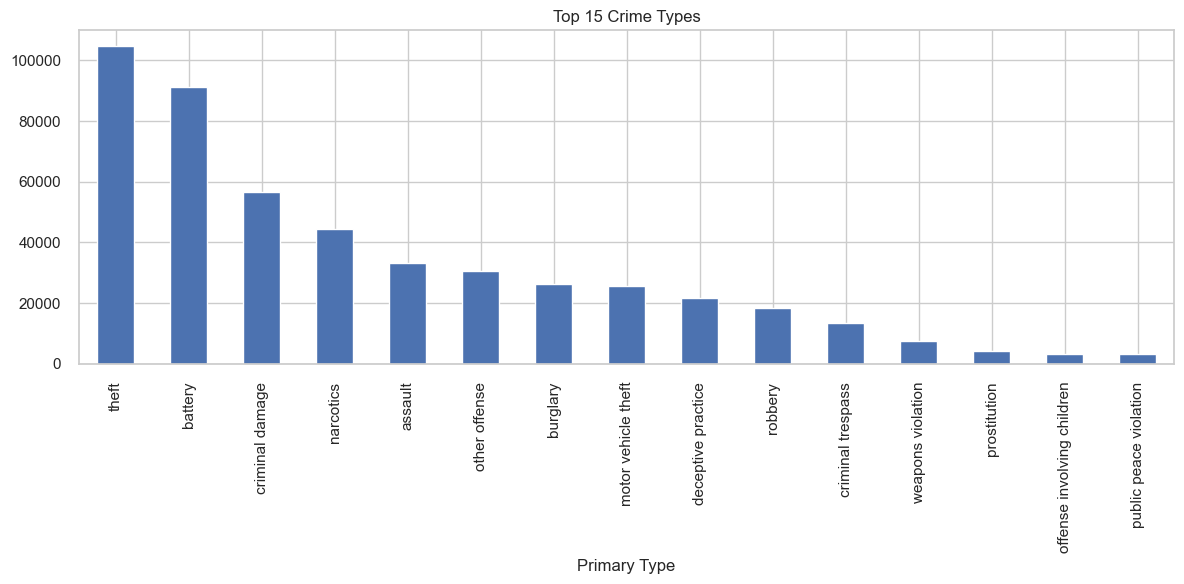

In [ ]:
crime_counts = df["Primary Type"].value_counts()
crime_counts.head(15).plot(kind="bar", figsize=(12,5))
plt.title("Top 15 Crime Types")
plt.tight_layout()
plt.show()

Geographic Patterns

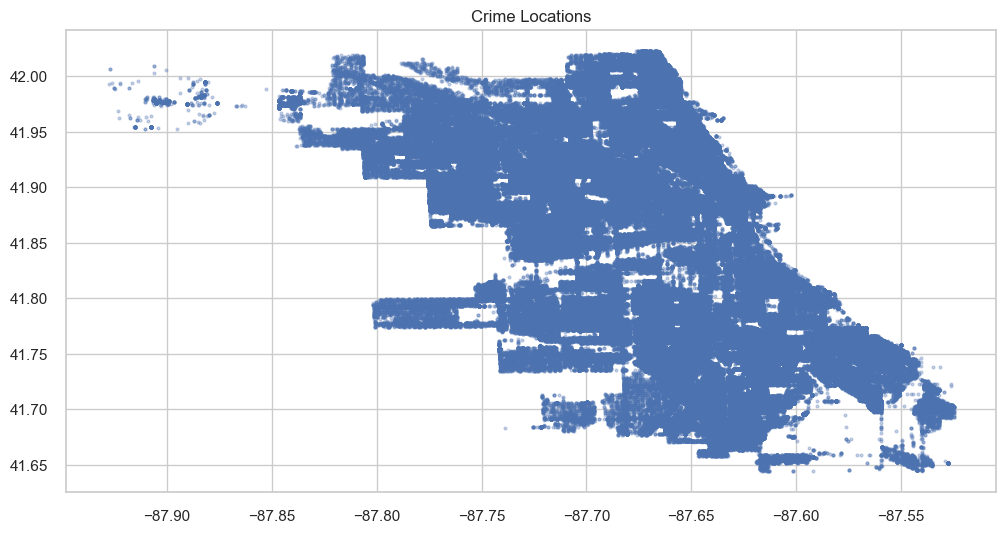

In [39]:
plt.figure(figsize=(12,6))
plt.scatter(df["Longitude"], df["Latitude"], s=4, alpha=0.3)
plt.title("Crime Locations")
plt.show()


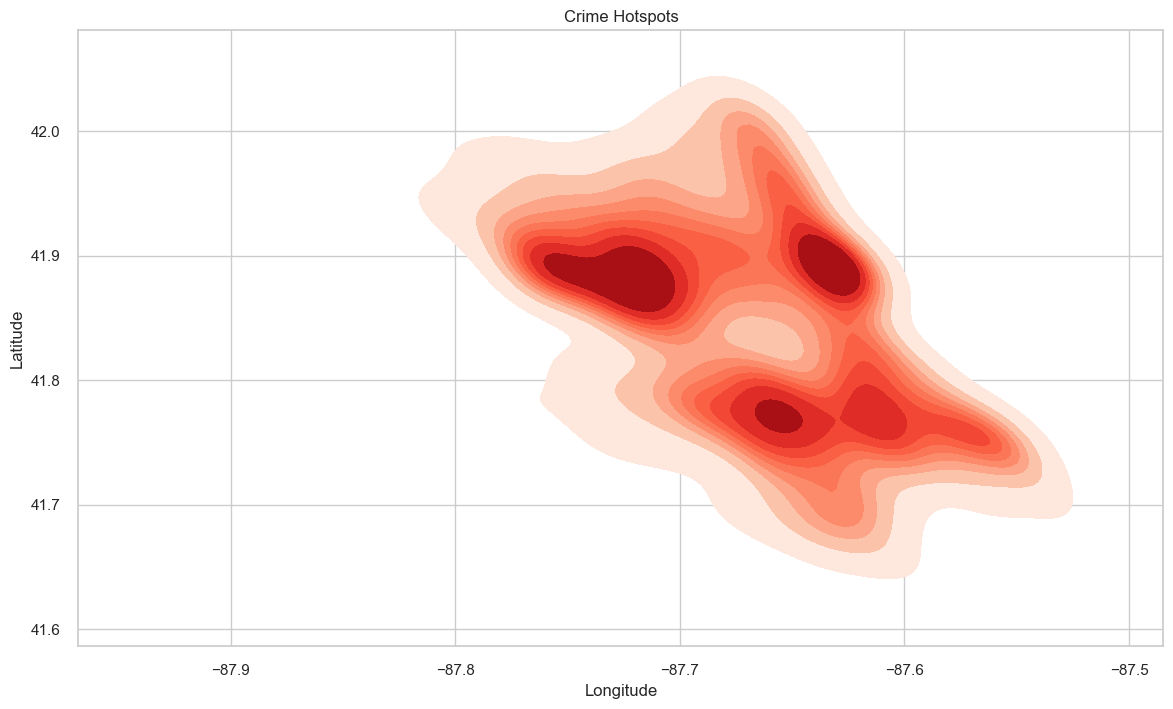

In [35]:
plt.figure(figsize=(14,8))
sns.kdeplot(
    x=df["Longitude"],
    y=df["Latitude"],
    fill=True,
    cmap="Reds",
    bw_adjust=2
)
plt.title("Crime Hotspots")
plt.show()


Temporal Trends

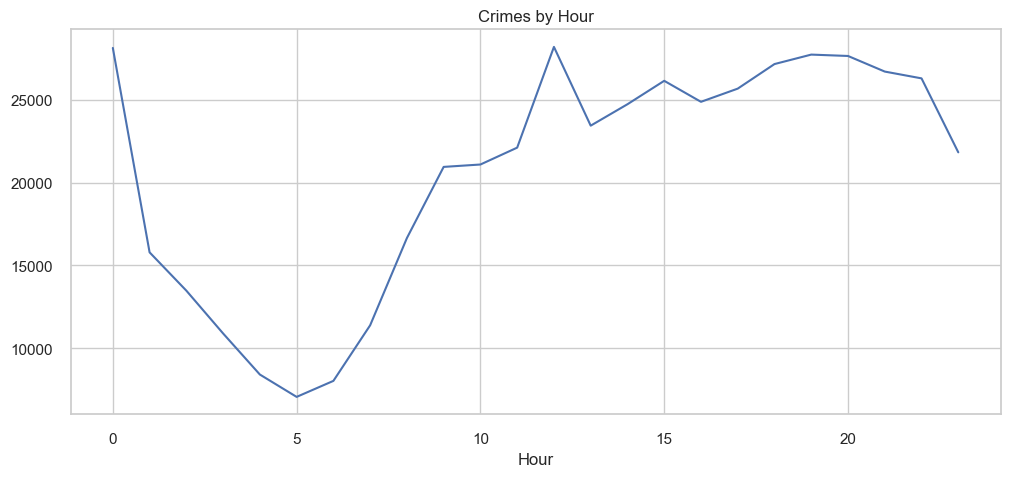

In [33]:
df["Hour"].value_counts().sort_index().plot(figsize=(12,5))
plt.title("Crimes by Hour")
plt.show()


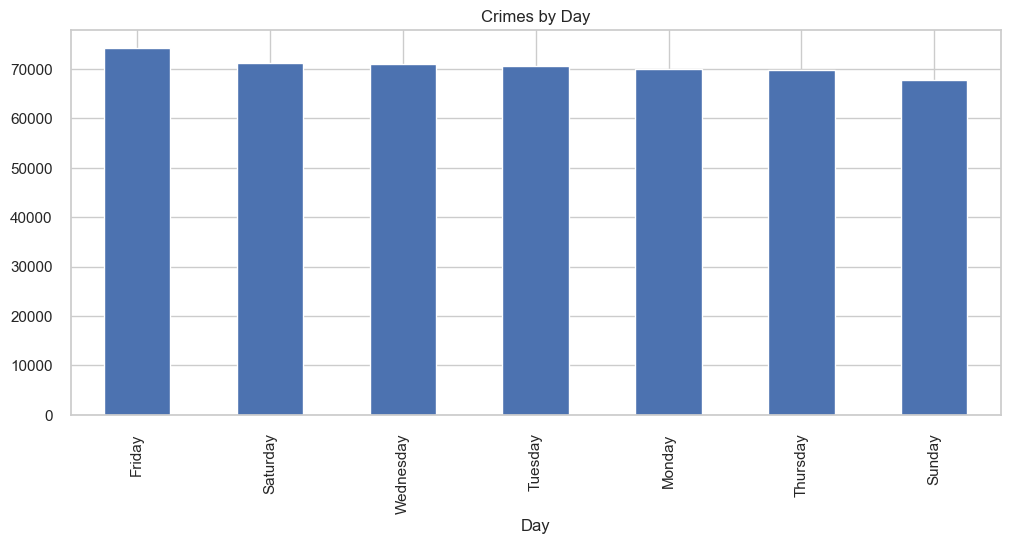

In [32]:
df["Day"].value_counts().plot(kind="bar", figsize=(12,5))
plt.title("Crimes by Day")
plt.show()


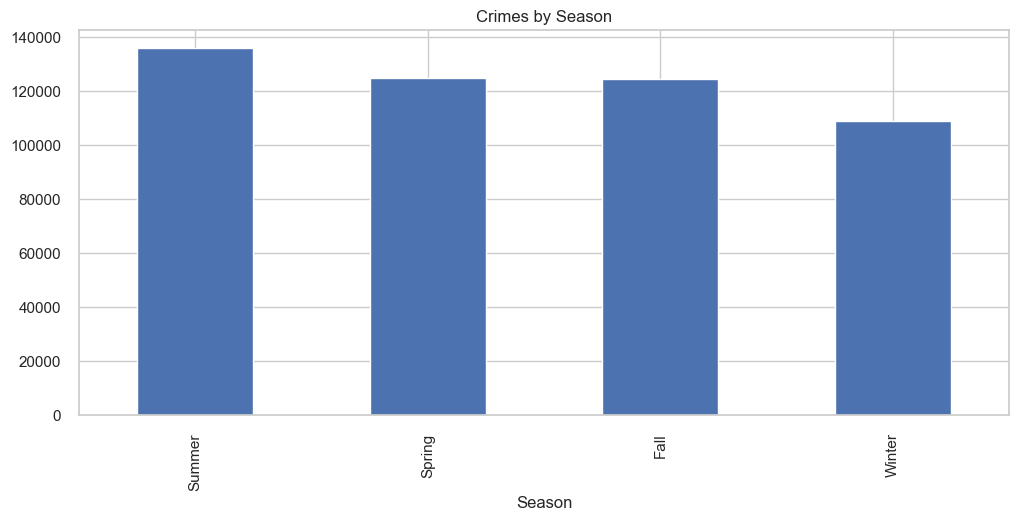

In [31]:
df["Season"].value_counts().plot(kind="bar", figsize=(12,5))
plt.title("Crimes by Season")
plt.show()


Crime Trend by Year

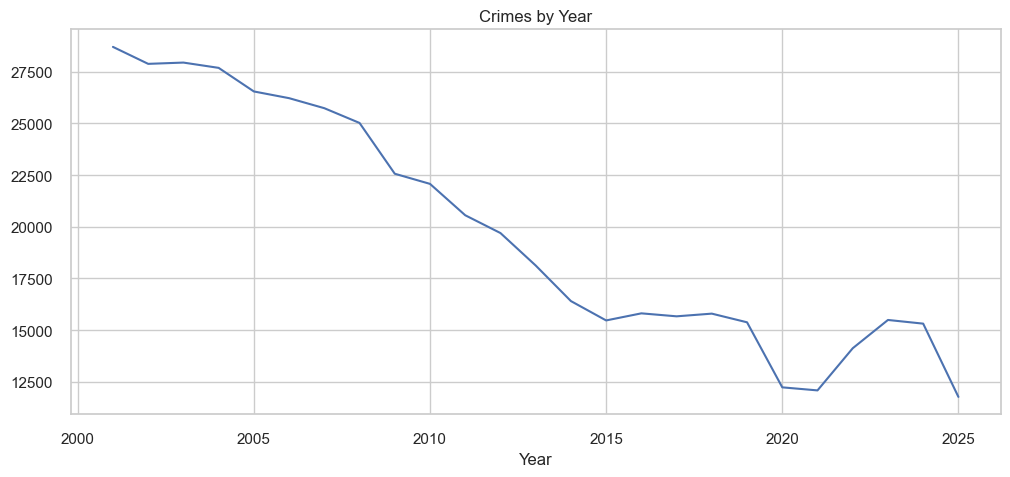

In [29]:
df["Year"].value_counts().sort_index().plot(figsize=(12,5))
plt.title("Crimes by Year")
plt.show()


Heatmap: Hour vs Day

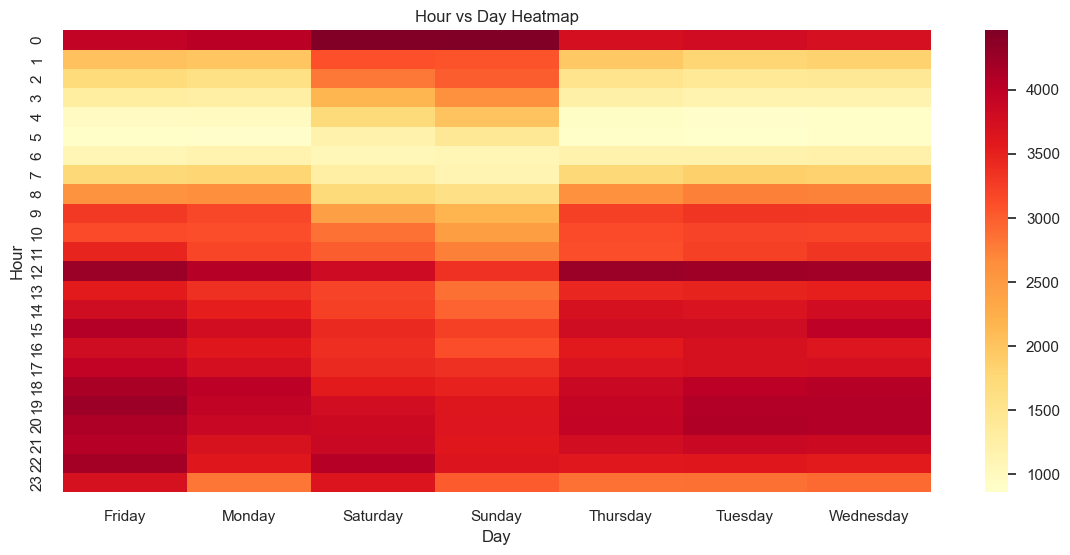

In [36]:
pivot = pd.crosstab(df["Hour"], df["Day"])
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Hour vs Day Heatmap")
plt.show()


Arrest & Domestic Analysis

In [20]:
print("Arrest Rate:", df["Arrest"].mean())
print("Domestic Rate:", df["Domestic"].mean())
print(df[["Arrest","Domestic"]].corr())


Arrest Rate: 0.25241767757285405
Domestic Rate: 0.173668153015724
            Arrest  Domestic
Arrest    1.000000 -0.062363
Domestic -0.062363  1.000000


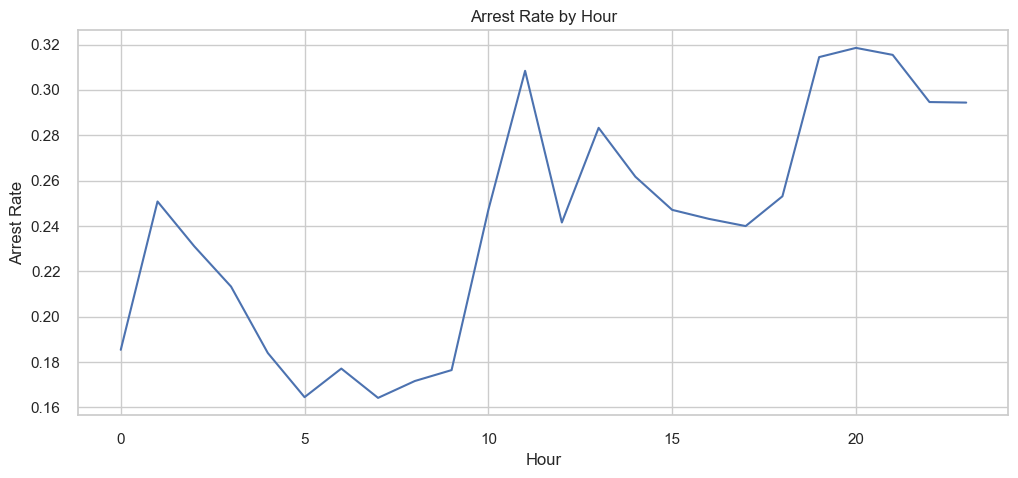

In [37]:
df.groupby("Hour")["Arrest"].mean().plot(figsize=(12,5))
plt.title("Arrest Rate by Hour")
plt.ylabel("Arrest Rate")
plt.show()


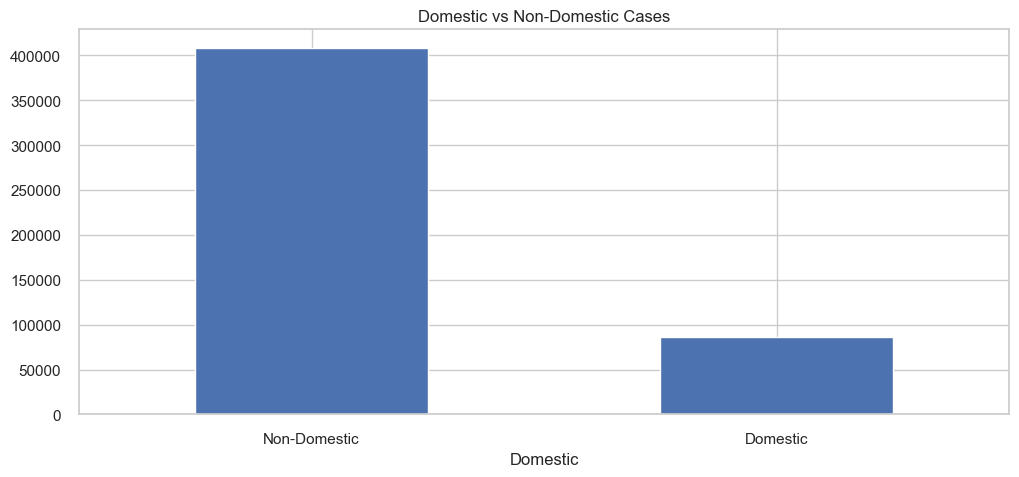

In [38]:
df["Domestic"].value_counts().plot(kind="bar", figsize=(12,5))
plt.title("Domestic vs Non-Domestic Cases")
plt.xticks([0,1], ["Non-Domestic","Domestic"], rotation=0)
plt.show()


Simple Statistical Summary

In [23]:
print(df[["Arrest","Domestic","Latitude","Longitude"]].describe())

print("\nTop Crime Locations:")
print(df["Location Description"].value_counts().head(10))

print("Most Common Crime:", df["Primary Type"].value_counts().idxmax())
print("Busiest Month:", df["Month"].value_counts().idxmax())
print("Busiest Day:", df["Day"].value_counts().idxmax())
print("Busiest Hour:", df["Hour"].value_counts().idxmax())


              Arrest       Domestic       Latitude      Longitude
count  494276.000000  494276.000000  494276.000000  494276.000000
mean        0.252418       0.173668      41.842626     -87.671291
std         0.434400       0.378824       0.086494       0.059022
min         0.000000       0.000000      41.644585     -87.927882
25%         0.000000       0.000000      41.768938     -87.713363
50%         0.000000       0.000000      41.856478     -87.665595
75%         1.000000       0.000000      41.907153     -87.628099
max         1.000000       1.000000      42.022645     -87.524529

Top Crime Locations:
Location Description
street                            129689
residence                          80638
apartment                          59094
sidewalk                           45052
other                              15591
parking lot/garage(non.resid.)     11756
alley                              11202
small retail store                  9976
school, public, building           